# Analyse en Composantes Principales (ACP)

*Principal Component analysis (PCA)*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.preprocessing import StandardScaler    # module pour centrer et réduire les variables
from sklearn.decomposition import PCA               # module pour utiliser l'ACP

## Jeu de données sur les iris

In [3]:
import sklearn.datasets as sk_data
iris = sk_data.load_iris()
X = iris.data    # les données(lignes = individus, colonnes = variables)
y = iris.target   # les étiquettes (=la variété des iris)

On redimensionne les données.

In [4]:
sc_scaled = StandardScaler().fit(X)
Xcr = sc_scaled.transform(X)

n=Xcr.shape[0]
p=Xcr.shape[1]

On applique l'ACP sur les données centrées réduites (Xcr).

In [5]:
acp = PCA()
acp.fit(Xcr)
print(acp)

# axes principaux : les vecteurs propres
axes_principaux=acp.components_    
# composantes principales = les nouvelles coordonnées
composantes_principales = acp.fit_transform(Xcr)     
# les variances expliquées = les valeurs propres
var_exp=(n-1)/n*acp.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


Critères empiriques pour trouver le nombre de composantes principales à garder.

proportion de variance expliquée [0.72962445 0.22850762 0.03668922 0.00517871]


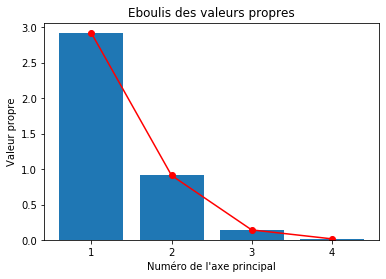

In [6]:
#proportion de variance expliquée
print("proportion de variance expliquée", acp.explained_variance_ratio_)

#éboulis des valeurs propres
plt.bar(np.arange(1,p+1),var_exp)
plt.plot(np.arange(1,p+1),var_exp, 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,p+1)) 
plt.title("Eboulis des valeurs propres")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de l'axe principal")
plt.show()

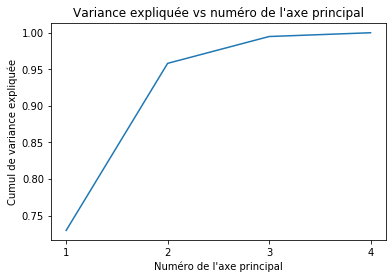

In [7]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,p+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

On représente les individus dans le plan des 2 ou 3 premiers axes principaux.

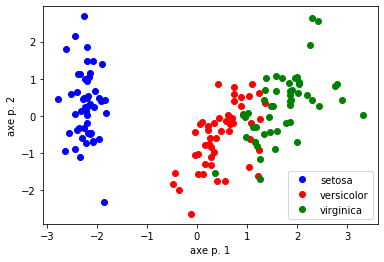

In [8]:
#positionnement des individus dans le plan des 2 premières composantes principales
indices_setosa=[]
indices_versicolor=[]
indices_virginica=[]
for i in range(y.shape[0]):
    if y[i]==0:
        indices_setosa.append(i)
    if y[i]==1:
        indices_versicolor.append(i)
    if y[i]==2:
        indices_virginica.append(i)
        
        
fig, axes = plt.subplots()
plt.clf()
plt.plot(composantes_principales[indices_setosa,0],composantes_principales[indices_setosa,1], 'bo', label='setosa')
plt.plot(composantes_principales[indices_versicolor,0],composantes_principales[indices_versicolor,1], 'ro', label='versicolor')
plt.plot(composantes_principales[indices_virginica,0],composantes_principales[indices_virginica,1], 'go', label='virginica')
plt.legend()
plt.xlabel('axe p. 1')
plt.ylabel('axe p. 2')

plt.show()

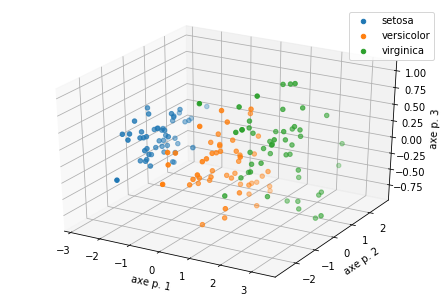

In [9]:
# dans le plan 3D des 3 premières composantes
fig= plt.figure()
plt.clf()
ax = Axes3D(fig)
ax.scatter(composantes_principales[indices_setosa,0],composantes_principales[indices_setosa,1], composantes_principales[indices_setosa,2], label='setosa')
ax.scatter(composantes_principales[indices_versicolor,0],composantes_principales[indices_versicolor,1], composantes_principales[indices_versicolor,2], label='versicolor')
ax.scatter(composantes_principales[indices_virginica,0],composantes_principales[indices_virginica,1], composantes_principales[indices_virginica,2], label='virginica')

plt.legend()
ax.set_xlabel('axe p. 1')
ax.set_ylabel('axe p. 2')
ax.set_zlabel('axe p. 3')  

plt.show()

## Jeu de données sur les mammifères

In [10]:
X = np.loadtxt('mammals.csv', delimiter=';', usecols=[1,2,3,4,5,6,7,8,9,10], skiprows=1)

#Les colonnes : 
#1 : Poids du corps (kg)
#2 : Poids du cerveau (g)
#3 : sommeil lent (sans reves) (h/jour)
#4 : sommeil paradoxal (avec reves) (h/jour)
#5 : durée totale du sommeil (h/jour)
#6 : Durée de vie maximale (années)
#7 : Temps de gestation (jours)
#8 : indice de prédation
#9 : indice d exposition
#10 : indice de danger global

# on redimentionne les colonnes car les variables sont de nature très différentes entre elles ici
sc_scaled = StandardScaler().fit(X)
X = sc_scaled.transform(X)

On redimensionne les données.

In [11]:
# on veut afficher les variables et non les individus donc on transpose la matrice X
sc_scaled = StandardScaler().fit(X.T)
Xcr = sc_scaled.transform(X.T)

n=Xcr.shape[0]
p=Xcr.shape[1]

On applique l'ACP sur les données centrées réduites.

In [12]:
acp = PCA()
acp.fit(Xcr)
print(acp)

# axes principaux : les vecteurs propres
axes_principaux=acp.components_    
# composantes principales = les nouvelles coordonnées
composantes_principales = acp.fit_transform(Xcr)     
# les variances expliquées = les valeurs propres
var_exp=(n-1)/n*acp.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


Critères empiriques pour trouver le nombre de composantes principales à garder.

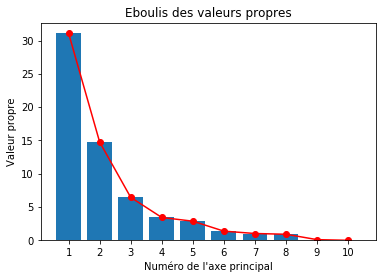

In [13]:
#éboulis des valeurs propres
plt.bar(np.arange(1,n+1),var_exp)         # n ici et non p car min(p,n)=n
plt.plot(np.arange(1,n+1),var_exp, 'ro-')
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,n+1)) 
plt.title("Eboulis des valeurs propres")
plt.ylabel("Valeur propre")
plt.xlabel("Numéro de l'axe principal")

plt.show()

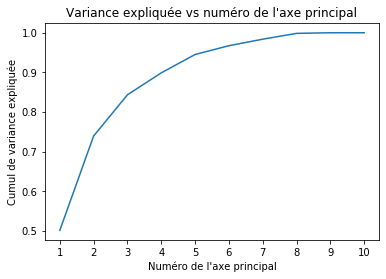

In [14]:
#cumul de variance expliquée
plt.figure(3)
plt.clf()
plt.plot(np.arange(1,n+1),np.cumsum(acp.explained_variance_ratio_))
axes = plt.gca()
axes.xaxis.set_ticks(np.arange(1,n+1)) 
plt.title("Variance expliquée vs numéro de l'axe principal")
plt.ylabel("Cumul de variance expliquée")
plt.xlabel("Numéro de l'axe principal")
plt.show()

On représente les individus dans le plan des 2 ou 3 premiers axes principaux.

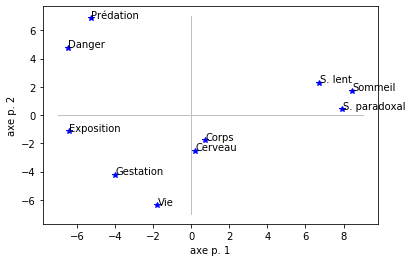

In [15]:
# dans le plan 2D des 2 premiers axes principaux
index=['Corps', 'Cerveau', 'S. lent', 'S. paradoxal', 'Sommeil', 'Vie', 'Gestation', 'Prédation', 'Exposition', 'Danger']
abscisse=np.linspace(-1, 1, 10001)
for i in range(np.shape(composantes_principales)[0]):
    plt.plot(composantes_principales[i,0],composantes_principales[i,1], 'b*')
    plt.annotate(index[i],(composantes_principales[i,0]+0.02,composantes_principales[i,1]+0.02))

plt.plot([0, 0],[-7, 7],color='silver',linestyle='-',linewidth=1)
plt.plot([-7, 9],[0, 0],color='silver',linestyle='-',linewidth=1)


plt.xlabel('axe p. 1')
plt.ylabel('axe p. 2')  

plt.show()

Text(0.5, 0, 'axe p. 3')

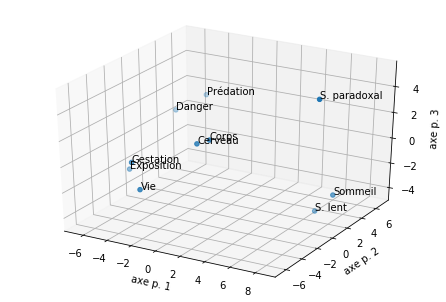

In [16]:
# dans le plan 3D des 3 premiers axes principaux
fig= plt.figure(3)
plt.clf()
ax = Axes3D(fig)
ax.scatter(composantes_principales[:,0],composantes_principales[:,1], composantes_principales[:,2], 'r')
for i in range(np.shape(composantes_principales)[0]):
    ax.text(composantes_principales[i,0]+0.02,composantes_principales[i,1]+0.02, composantes_principales[i,2]+0.02, '{}'.format(index[i]))

ax.set_xlabel('axe p. 1')
ax.set_ylabel('axe p. 2')
ax.set_zlabel('axe p. 3')  


## Image de Léna

In [17]:
import skimage.io as io
import skimage.color as color

In [18]:
f = io.imread("lena.tiff")
X = color.rgb2gray(f)     # X est une matrice avec les niveaux de gris de l'image

On redimensionne les données.

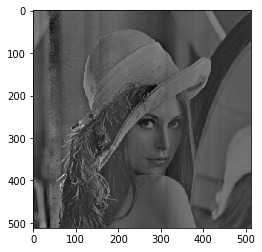

In [19]:
sc_scaled = StandardScaler().fit(X)
Xcr = sc_scaled.transform(X)
plt.imshow(Xcr, cmap="gray")

n=Xcr.shape[0]
p=Xcr.shape[1]

On applique l'ACP sur les données centrées réduites

In [20]:
acp = PCA()
acp.fit(Xcr)
print(acp)

# axes principaux : les vecteurs propres
axes_principaux=acp.components_    
# composantes principales = les nouvelles coordonnées
composantes_principales = acp.fit_transform(Xcr)     
# les variances expliquées = les valeurs propres
var_exp=(n-1)/n*acp.explained_variance_

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


On revient dans les axes initiaux (ici, on ne veut pas représenter X dans le plan des axes principaux, mais on veut représenter Y (les composantes principales) dans le plan initial).

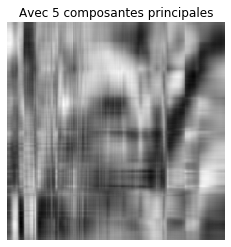

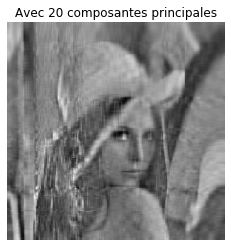

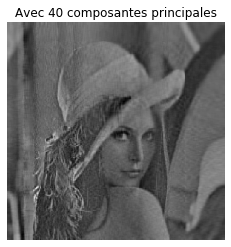

In [21]:
# on retourne aux variables initiales
i=0
q_liste=[5, 20, 40]
for q in q_liste:
    i+=1
    Xnouveau=np.matmul(composantes_principales[:,0:q] ,axes_principaux[0:q,:])
    plt.imshow(Xnouveau, cmap="gray")
    plt.axis('off')
    plt.title('Avec %d composantes principales' %q)
    plt.show()